Mark O'Neill
Student no: 20331964
[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]
x = 9.836435527578612
y = 30.850103443543677
[10, 10, -10, 10, 10, 10, -10, 10, -10, -10]
[10, 10, -10, 10, 10, 10, -10, -10, -10, 10]
[10, -10, -10, -10, 10, -10, 10, 10, 10, 10]


Text(0, 0.5, 'Probability density')

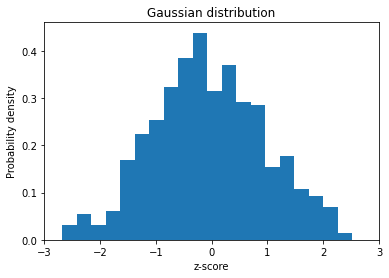

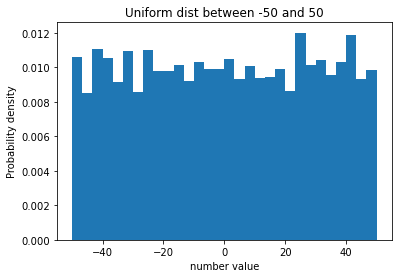

In [123]:
print("Mark O'Neill")
print("Student no: 20331964")

import numpy as np
import matplotlib.pyplot as plt
import scipy as sc

# Question 2 mini-exercises

# a
z = np.array([(0,0)]*1000)
print(z)

# b
def func(array,a,b):
    return (sum(array)**a),(sum(array)**b)
rand_array = np.random.rand(10)
x, y = func(rand_array,2,3)
print("x =",x)
print("y =",y)

# c
np.random.seed(20331964)
gauss_array = np.random.normal(size = 500)
plt.figure()
plt.hist(gauss_array, bins = 20, density = True)
plt.title("Gaussian distribution")
plt.xlabel("z-score")
plt.ylabel("Probability density")
plt.xlim(-3,3)

# d
for i in range(3):
    choice_array = [10 if x==1 else -10 for x in np.random.choice(2,10)]
    print(choice_array)

# e
z2 = []
for i in range(50):
    for j in range(100):
        z2.append(np.random.uniform(-50,50))



plt.figure()
plt.hist(z2, bins = 30, density = True)
plt.title("Uniform dist between -50 and 50")
plt.xlabel("number value")
plt.ylabel("Probability density")
plt.ylabel("Probability density") 


In [124]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Sat Nov  5 15:23:24 2022

@author: markoneill
"""

#Thermo CA 2

import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
import math

student_no = 20331964
CA = 2
np.random.seed(student_no+CA)


def waiting_time(M,F,V,v,X,x): # X and x are positive
    if (v>0) == True: # right
        return (M/F)*(V-v + np.sqrt( (((V-v)**2) - 2*(F/M)*(x-X))) )
    if (v<0) == True: # left
        return (M/F)*(V+v + np.sqrt( (((V+v)**2) + 2*(F/M)*(x+X))) )

def Wwvelocity(M,F,V,m,v,delta_t):
    if (v>0) == True: # right
        W = ((+2*m*v) + (M-m)*V) / (m+M)
        w = ((+2*M*V) + (m-M)*v) / (m+M)
    if (v<0) == True: # left
        W = ((-2*m*v) + (M-m)*V) / (m+M)
        w = ((-2*M*V) + (m-M)*v) / (m+M)
    return w, W

def equi_pos(N,R,T,F):
    return (N*R*T)/F

def x_motion_particle(previousx,v,delta_t):
    currentx = previousx + v*delta_t
    return currentx

def X_motion_piston(previousX,V,delta_t,F,M):
    currentX = previousX + V*delta_t + 0.5*(-F/M)*(delta_t**2)
    return currentX

def V_motion_piston(previousV,delta_t,F,M):
    return previousV + (-F/M)*delta_t

def min_waiting_time(time0,N,M,F,V_0,v_vel,X_0,x_pos):
    index = 0
    for i in range(0,N):
        time1 = waiting_time(M,F,V_0,v_vel[i],X_0,x_pos[i])
        if time1 <= time0:
            time0 = time1
            index = i
    return time0, index


def weighted(X_list, delta_t_list,selection):
    return np.average(X_list[-selection:], weights = delta_t_list[-selection:])

Mark O'Neill
20331964


In [2]:
# (a)

k_B = 1
R = 1
N = 1000
M = 100
m = 1
T_0 = 1
F = 10

X_0 = 2*equi_pos(N, R, T_0, F)
print(X_0)

V_0 = -np.random.normal(scale = np.sqrt((k_B*T_0)/M))
x_pos = [np.random.uniform(-X_0,X_0) for i in range(N)]
v_vel = [np.random.normal(scale = np.sqrt((k_B*T_0)/m)) for i in range(N)]

time_steps = np.arange(0,20*1000,1)
t_list = []
X_list = []
V_list = []
delta_t_list = []
t = 0
delta_t = 0
for i in time_steps:
    delta_t, index1 = min_waiting_time(1e10,N,M,F,V_0,v_vel,X_0,x_pos)   
    
    for i in range(N):
        x_pos[i] = x_motion_particle(x_pos[i],v_vel[i],(delta_t))
        
    X_0 = abs(x_pos[index1])
    V_0 = V_motion_piston(V_0,delta_t,F,M)
    v_vel[index1] , V_0 = Wwvelocity(M,F,V_0,m,v_vel[index1],delta_t)
    t = t + (delta_t)
    
    t_list.append(t)
    delta_t_list.append(delta_t)
    X_list.append(X_0)
    V_list.append(V_0)


200.0


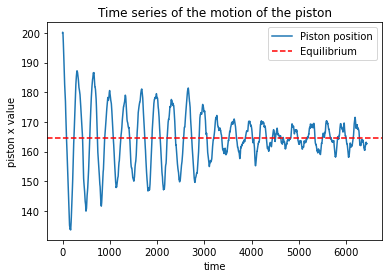

In [3]:
plt.plot(t_list,X_list,label = "Piston position")
average1 = sum(X_list)/len(X_list)
plt.axhline(y=average1, color='r', linestyle='--',label = "Equilibrium")
# plt.plot(time_steps,X_list)
plt.title("Time series of the motion of the piston")
plt.xlabel("time")
plt.ylabel("piston x value")

plt.legend()
plt.show()

[[], [], [], [], [], [], []]
10000.0


No handles with labels found to put in legend.


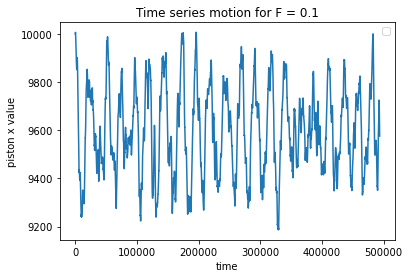

3333.3333333333335


No handles with labels found to put in legend.


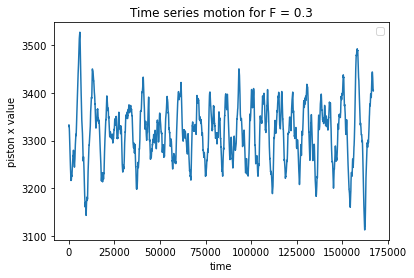

1000.0


No handles with labels found to put in legend.


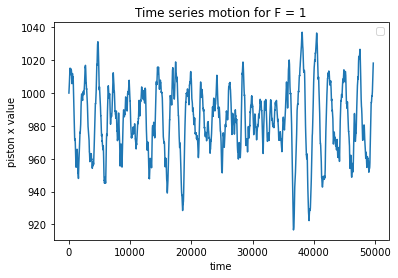

333.3333333333333


No handles with labels found to put in legend.


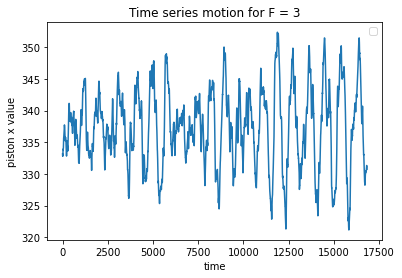

100.0


No handles with labels found to put in legend.


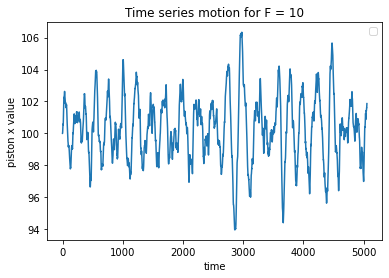

33.333333333333336


No handles with labels found to put in legend.


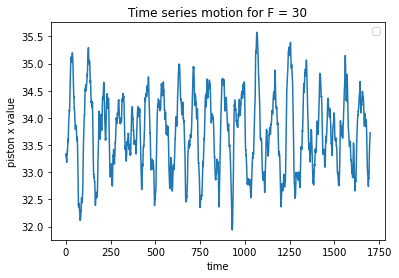

10.0


No handles with labels found to put in legend.


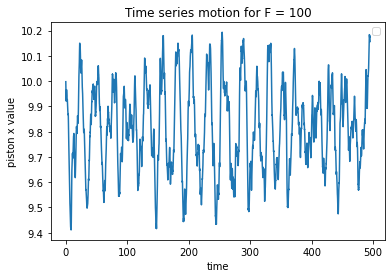

In [4]:
# (b)

F_list = [0.1,0.3,1,3,10,30,100]
time_steps = np.arange(0,20*1000,1)
delta_t_list = [[]]*len(F_list)
t_list = [[]]*len(F_list)
#t_list = [[1],[2],[3],[4],[5]] 
X_list = [[]]*len(F_list)
V_list = [[]]*len(F_list)
#v_list = [[]]*len(F_list)
print(t_list)

for j in range(0,len(F_list)):
    F = F_list[j]
    X_0 = equi_pos(N, R, T_0, F)
    print(X_0)
    V_0 = -np.random.normal(scale = np.sqrt((k_B*T_0)/M))
    x_pos = [np.random.uniform(-X_0,X_0) for i in range(N)]
    v_vel = [np.random.normal(scale = np.sqrt((k_B*T_0)/m)) for i in range(N)]
    t = 0
    delta_t = 0
    t_list[j] = []
    X_list[j] = []
    delta_t_list[j] = []
    V_list[j] = []
    #v_list[j] = []
    for i in time_steps:
        delta_t, index1 = min_waiting_time(1e10,N,M,F,V_0,v_vel,X_0,x_pos)   

        # print(delta_t)
        for i in range(N):
            x_pos[i] = x_motion_particle(x_pos[i],v_vel[i],(delta_t))
        X_0 = abs(x_pos[index1])
        V_0 = V_motion_piston(V_0,delta_t,F,M)

        v_vel[index1] , V_0 = Wwvelocity(M,F,V_0,m,v_vel[index1],delta_t)
        # X_0 = X_motion_piston(X_0,V_0,delta_t,F,M) 
        t = t + (delta_t)
        t_list[j].append(t)
        #v_list[j].append(v_vel)
        delta_t_list[j].append(delta_t)
        X_list[j].append(X_0)
        V_list[j].append(V_0)
        # delta_t = delta_t_new

    plt.plot(t_list[j],X_list[j])
    average1 = sum(X_list[j])/len(X_list[j])
    #plt.axhline(y=average1, color='r', linestyle='--', label = "Weighted average")
    # plt.plot(time_steps,X_list)
    plt.title("Time series motion for F = " + str(F_list[j]))
    plt.xlabel("time")
    plt.ylabel("piston x value")
    
    plt.legend()
    plt.show()

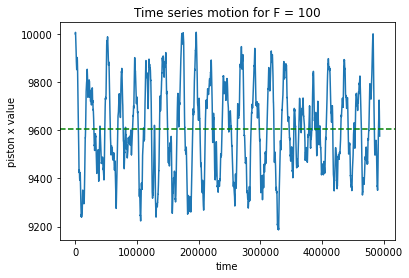

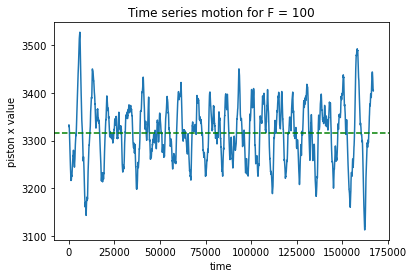

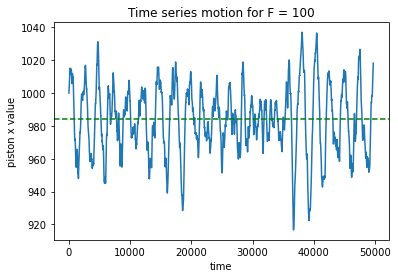

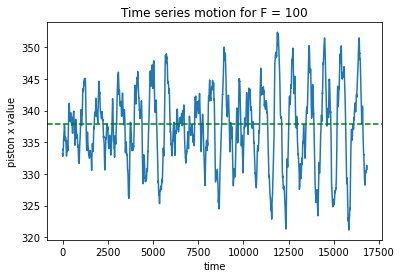

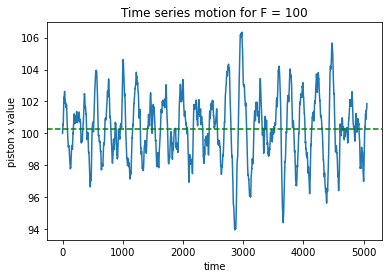

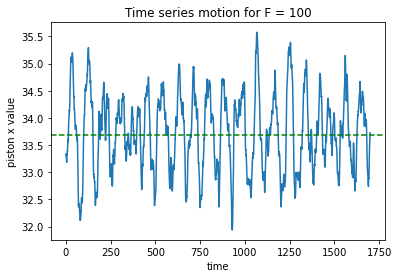

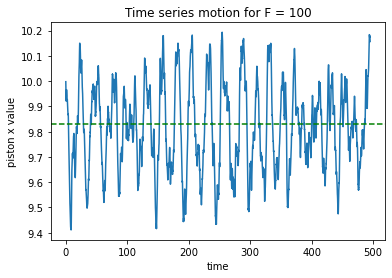

In [5]:

average = [0]*len(F_list)
for i in range(0,len(F_list)):
    plt.title("Time series motion for F = " + str(F_list[j]))
    plt.xlabel("time")
    plt.ylabel("piston x value")
    plt.plot(t_list[i],X_list[i])
    average[i] = weighted(X_list[i],delta_t_list[i],5000)
    plt.axhline(y=average[i], color='g', linestyle='--', label = "Weighted average")
    plt.show()


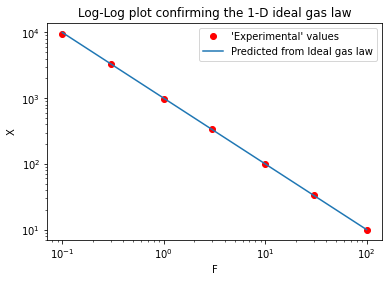

In [6]:
X_0_list = [equi_pos(N, R, T_0, i) for i in F_list]
plt.loglog(F_list,average,'ro',label = "'Experimental' values")
plt.loglog(F_list,X_0_list, label = "Predicted from Ideal gas law")
plt.xlabel("F")
plt.ylabel("X")
plt.title("Log-Log plot confirming the 1-D ideal gas law")
plt.legend()
plt.show()

200.0


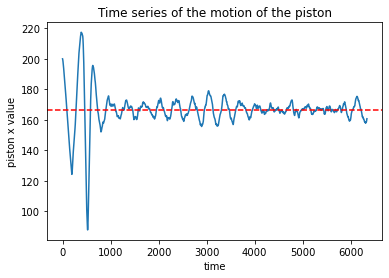

In [100]:
# Part (c)
np.random.seed(43)

def choice_v(N,k_B,T,m):
    v_0 = np.sqrt((k_B*T_0)/m)
    choice_array = [v_0 if x==1 else -v_0 for x in np.random.choice(2,size = N)]
    return choice_array


N_A = 6.0221408e+23
k_B = 1
# R = k_B*N_A
# R = 8.3144598
R = 1
N = 1000
# k_B = 1
M = 100
m = 1
T_0 = 1
F = 10

X_0 = 2*equi_pos(N, R, T_0, F)
print(X_0)

V_0 = -np.random.normal(scale = np.sqrt((k_B*T_0)/M))
x_pos = [np.random.uniform(-X_0,X_0) for i in range(N)]
#v_vel = [np.random.normal(scale = np.sqrt((k_B*T_0)/m)) for i in range(N)]
v_vel = choice_v(N,k_B,T_0,m)
#print(v_vel)

time_steps = np.arange(0,20*1000,1)
t_list = []
X_list = []
V_list = []

v_list = []
delta_t_list = []
t = 0
delta_t = 0
plt.title("Time series of the motion of the piston")
for i in time_steps:
    delta_t, index1 = min_waiting_time(1e10,N,M,F,V_0,v_vel,X_0,x_pos)   
    
    for i in range(N):
        x_pos[i] = x_motion_particle(x_pos[i],v_vel[i],(delta_t))
    
    X_0 = abs(x_pos[index1])
    V_0 = V_motion_piston(V_0,delta_t,F,M)
    v_vel[index1] , V_0 = Wwvelocity(M,F,V_0,m,v_vel[index1],delta_t)
    t = t + (delta_t)
    
    v_list.append(v_vel[:]) # I was having so much difficulty here, added [:] on a whim and it fixed it!!!
    t_list.append(t)
    delta_t_list.append(delta_t)
    X_list.append(X_0)
    V_list.append(V_0)


plt.plot(t_list,X_list)
average1 = sum(X_list)/len(X_list)
plt.axhline(y=average1, color='r', linestyle='--')
# plt.plot(time_steps,X_list)
plt.xlabel("time")
plt.ylabel("piston x value")

plt.show()

20000


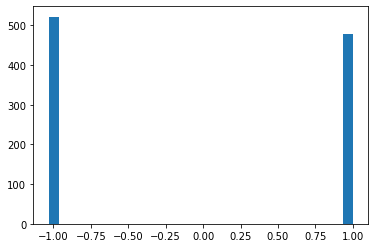

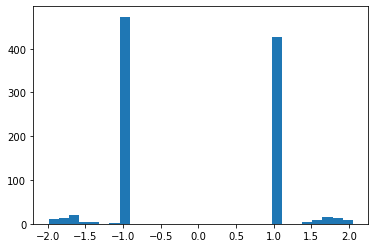

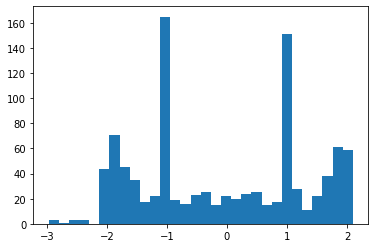

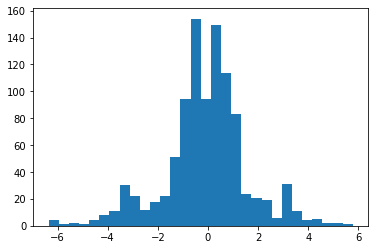

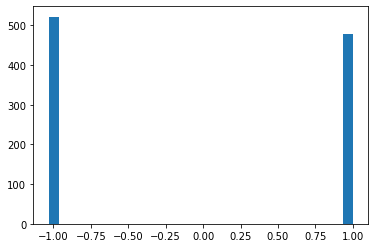

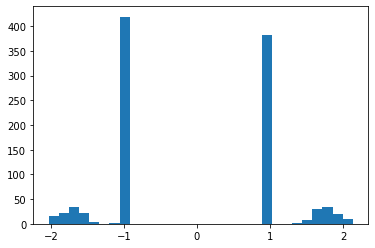

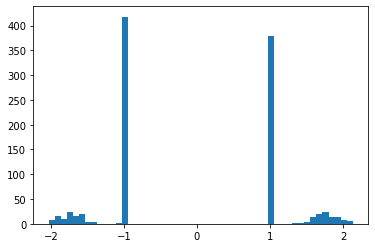

[[ 1.          1.          1.         ... -1.         -1.
   1.        ]
 [ 1.          1.          1.         ... -1.         -1.
   1.        ]
 [ 1.          1.          1.         ... -1.         -1.
   1.        ]
 ...
 [-0.40562301  0.70694831  0.23622207 ... -0.63550189 -1.70019175
   0.62542194]
 [-0.40562301  0.70694831  0.23622207 ... -0.63550189 -1.70019175
   0.62542194]
 [-0.40562301  0.70694831  0.23622207 ... -0.63550189 -1.70019175
   0.62542194]]


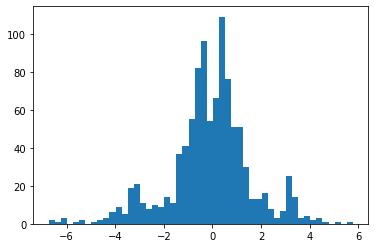

In [8]:
#plt.hist(v_list1[0:100], bins = 50)
plt.show()
print(len(v_list))

#for i in [0,100,1000,10000,1999]:
for i in [0,100,1000,1999]:
    plt.hist(v_list[i],bins = 30)
    plt.show()

plt.hist(v_list[0],bins = 30)
plt.show()
plt.hist(v_list[200],bins = 30)
plt.show()
plt.hist(v_list[201],bins = 50)
plt.show()
plt.hist(v_list[1990],bins = 50)

print(np.array(v_list))

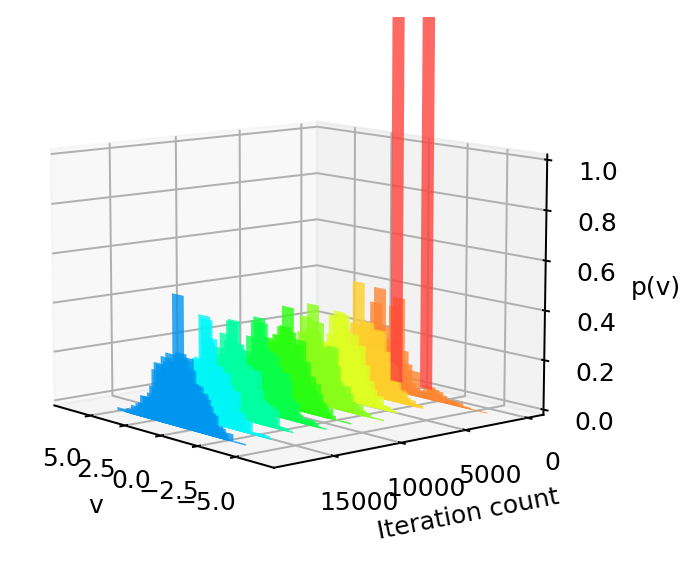

In [121]:
from mpl_toolkits.mplot3d import Axes3D
# %pip install colour
from colour import Color

spacing = 2000
plotting_list = time_steps[::spacing]
starting_colour = Color('#Fe433C') # Red
ending_colour = Color('#0095eF') # Blue
colour_list = list(starting_colour.range_to(ending_colour,len(plotting_list)))
fig = plt.figure(dpi = 180)
ax = fig.add_subplot(111, projection='3d')
nbins = 50
for z in time_steps[::spacing]:
    ys = v_list[z]
    hist, bins = np.histogram(ys, bins=nbins, density = True)
    xs = (bins[:-1] + bins[1:])/2
    ax.bar(xs, hist, zs=z, zdir='y', alpha=0.8, color = colour_list[int(z/spacing)].hex)

ax.set_xlabel('v')
ax.set_ylabel('Iteration count')
ax.set_zlabel('p(v)')
ax.set_zlim(0, 1)
ax.view_init(elev=10., azim=140)
plt.show()

Mean: -0.15930381464096285
Standard deviation:1.6503800374730984


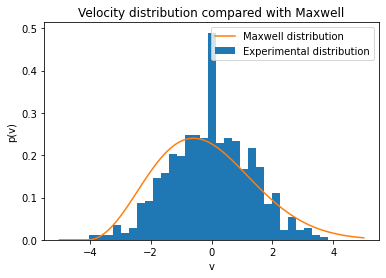

In [112]:
from scipy.stats import maxwell
params = maxwell.fit(v_list[-1], scale = 1)
x = np.linspace(-5,5,100)
maxwell_list = list(maxwell.rvs(*params,size = 100000))
print("Mean: " + str(sum(maxwell_list)/len(maxwell_list)))
print("Standard deviation:" +str(np.std(maxwell_list)))

plt.title("Velocity distribution compared with Maxwell")
plt.hist(v_list[-1], bins = 30,density = True, label = "Experimental distribution")
plt.plot(x, maxwell.pdf(x, *params), label = "Maxwell distribution")
plt.xlabel("v")
plt.ylabel("p(v)")
plt.legend()

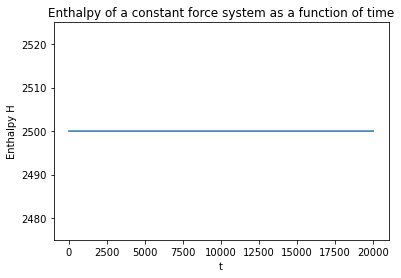

In [57]:
# d (i)
# H = U + FL
H_list = []
for i in range(len(time_steps)):
    v_squared_list = []
    for j in (v_list[i]):
        v_squared_list.append(j**2)
    U = 0.5*m*(sum(v_squared_list)) + 0.5*M*(V_list[i]**2)
    FL = F*(X_list[i])
    H_list.append(U+FL)

plt.figure()
plt.plot(time_steps,H_list)
plt.title("Enthalpy of a constant force system as a function of time")
plt.xlabel("t")
plt.ylabel("Enthalpy H")
plt.ylim(2475,2525)
plt.show()

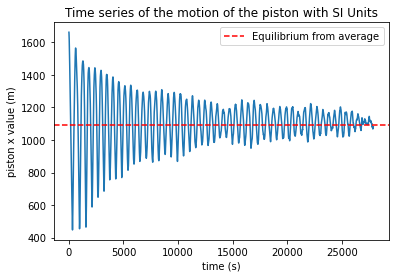

In [60]:
# d (ii)

N_A = 6.0221408e+23
k_B = 1.380649e-23 # J*K^-1
R = 8.3144598 # J*mol^-1*K^-1
N = 1000 # unitless
M = 100 # kg
m = 1 # kg
T_0 = 1 # K
F = 10 # N

def standard_motion(N,R,M,m,T_0,F,time_steps_range,):
    X_0 = 2*equi_pos(N, R, T_0, F)

    V_0 = -np.random.normal(scale = np.sqrt((k_B*T_0)/M))
    x_pos = [np.random.uniform(-X_0,X_0) for i in range(N)]
    v_vel = [np.random.normal(scale = np.sqrt((k_B*T_0)/m)) for i in range(N)]

    time_steps = np.arange(0,time_steps_range,1)
    t_list = []
    X_list = []
    V_list = []
    v_list = []
    delta_t_list = []
    t = 0
    delta_t = 0
    for i in time_steps:
        delta_t, index1 = min_waiting_time(1e10,N,M,F,V_0,v_vel,X_0,x_pos)   

        for i in range(N):
            x_pos[i] = x_motion_particle(x_pos[i],v_vel[i],(delta_t))
            
        X_0 = abs(x_pos[index1])
        V_0 = V_motion_piston(V_0,delta_t,F,M)
        v_vel[index1] , V_0 = Wwvelocity(M,F,V_0,m,v_vel[index1],delta_t)
        t = t + (delta_t)
        
        t_list.append(t)
        delta_t_list.append(delta_t)
        X_list.append(X_0)
        V_list.append(V_0)
        v_list.append(v_vel[:])
    return t_list, delta_t_list, X_list, V_list, v_list

motion_var = standard_motion(N,R,M,m,T_0,F,20000)
t_list = motion_var[0]
delta_t_list = motion_var[1]
X_list = motion_var[2]
V_list = motion_var[3]
v_list = motion_var[4]

plt.plot(t_list,X_list)
average1 = sum(X_list)/len(X_list)
plt.axhline(y=average1, color='r', linestyle='--',label = "Equilibrium from average")
# plt.plot(time_steps,X_list)
plt.title("Time series of the motion of the piston with SI Units")
plt.xlabel("time (s)")
plt.ylabel("piston x value (m)")

plt.legend()
plt.show()

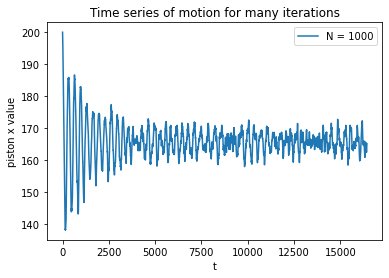

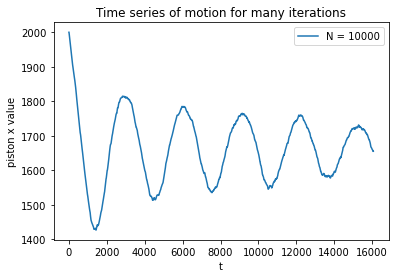

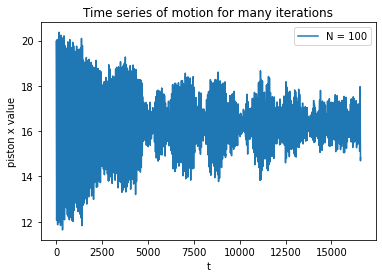

In [122]:
# d(iii)

k_B = 1
R = 1
N = 1000
M = 100
m = 1
T_0 = 1
F = 10
N_list = [1000,1000*10,int(1000/10)]
for i in N_list:
    motion_var2 = standard_motion(i,R,M,m,T_0,F,50000)
    plt.plot(motion_var2[0],motion_var2[2],label = ("N = "+str(i)))
    plt.title("Time series of motion for many iterations")
    plt.xlabel("t")
    plt.ylabel("piston x value")
    plt.legend()
    plt.show()